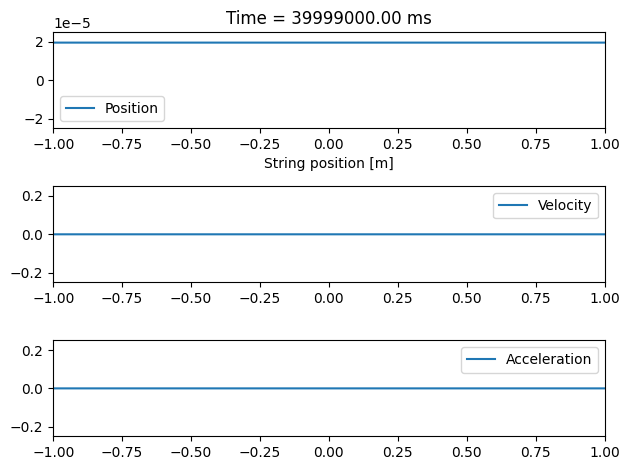

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy import sparse
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

rc('animation', html='jshtml', embed_limit=2**32)

v_wave = 400 # Wavespeed [m/s] = sqrt(T / mu)

# time array
t0 = 0.0
tf = 0.01
dt = tf / (100 * v_wave)
t_eval = np.arange(t0, tf, dt)

# Initial params
dz = 2 / (tf/dt)
z_string = np.arange(-1, 1, dz) # string, 2m long
arr_dim = z_string.size

b = .01 # impact parameter, 1 cm away
G = 1   # Gravitational const
M = 1   # Mass of inciting particle
v_0 = b * G * M / ((b**2 + z_string**2) * v_wave) # initial velocity as function of z

def wave(t):
    psi = - (G * M) / v_wave**2 * np.arctan((z_string - v_wave * t)/b) + (G * M) / v_wave**2 * np.arctan((z_string + v_wave * t)/b)
    psi_dot = b / v_wave * (G * M) / (b**2 + (z_string - v_wave * t)**2) + b / v_wave * (G * M) / (b**2 + (z_string + v_wave * t)**2)
    psi_ddot = (2 * G * M) / b**2 * (z_string - v_wave * t) / (b**2 + (z_string - v_wave * t)**2)**2 + (2 * G * M) / b**2 * (z_string + v_wave * t) / (b**2 + (z_string + v_wave * t)**2)**2
    return psi, psi_dot, psi_ddot


fig1, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.set_xlabel('String position [m]')
title = ax1.set_title(' ')
line1, = ax1.plot([], [], label='Position')
line2, = ax2.plot([], [], label='Velocity')
line3, = ax3.plot([], [], label='Acceleration')
ax1.set_ylim(-b / v_wave, b / v_wave)
ax1.set_xlim(-1, 1)
ax2.set_ylim(-v_0.max(), v_0.max())
ax3.set_ylim(-v_0.max(), v_0.max())
ax3.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.legend()
ax2.legend()
ax3.legend()

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    return line1, line2, 

def animate(t):
    psi, psi_dot, psi_ddot = wave(t)
    line1.set_data(z_string, psi)
    line2.set_data(z_string, psi_dot)
    line3.set_data(z_string, psi_ddot)
    title.set_text('Time = {:.2f} ms'.format(1000*t))
    return line1, line2,

anim = animation.FuncAnimation(fig1, animate, init_func=init, frames=len(t_eval), interval=5, blit=True)
fig1.tight_layout()
writervideo = animation.FFMpegWriter(fps=60)
anim.save('test.mp4', writervideo)





